# Gluon Dataset: Introduction to non-linear Regression using Tensorflow

## Source

https://github.com/rabah-khalek/TF_tutorials

## Learning Goals##
This notebook will serve as an introduction to the non-linear regression as well as the new extremely powerful TensorFlow library for Machine Learning (ML) from Google. We will also learn how to use the versatile Pandas package for handling data.


## Overview##
Throughout, we will work with the [Gluon dataset](https://github.com/rabah-khalek/TF_tutorials/tree/master/PseudoData). It is computed using the [LHAPDF](https://lhapdf.hepforge.org) open source code, a general purpose C++ and python interpolator, used for evaluating PDFs from discretised data files.

Here is the description of the Gluon dataset we will be playing around with for this notebook:
>A gluon is an elementary particle that acts as the exchange particle (or gauge boson) for the strong force between quarks. It is analogous to the exchange of photons in the electromagnetic force between two charged particles. 

>In technical terms, gluons are vector gauge bosons that mediate strong interactions of quarks in quantum chromodynamics (QCD). Gluons themselves carry the color charge of the strong interaction. This is unlike the photon, which mediates the electromagnetic interaction but lacks an electric charge. Gluons therefore participate in the strong interaction in addition to mediating it, making QCD significantly harder to analyze than QED (quantum electrodynamics).

>Because of the inherent non-perturbative nature of partons(quarks and gluon in general) which cannot be observed as free particles, parton densities cannot be calculated using perturbative QCD.
Parton distribution functions are obtained by fitting observables to experimental data; they cannot be calculated using perturbative QCD.

> The parton density function $f_i(x,Q)$ gives the probability of finding in the proton a parton of flavour $i$ (quarks or gluon) carrying a fraction $x$ of the proton momentum with $Q$ being the energy scale of the hard interaction. Cross sections are calculated by convo- luting the parton level cross section with the PDFs. Since QCD does not predict the parton content of the proton, the shapes of the PDFs are determined by a fit to data from experimental observables in various processes, using the DGLAP evolution equation.

> This PseudoData is computed from such fit performed by the [NNPDF collaboration](http://nnpdf.mi.infn.it) that determines the structure of the proton using contemporary methods of artificial intelligence. NNPDF determines PDFs using as an unbiased modeling tool Neural Networks, trained using Genetic Algorithms and recently stochastic Gradient descent, and used to construct a Monte Carlo representation of PDFs and their uncertainties: a probability distribution in a space of functions.

We Will consider the computed pseudodata to be the `truth` that we're trying to `discover`, but what we will fit actually is the `smeared truth` (noise added on top based on the uncertainties given).

## Importing the Gluon data set with Pandas

The dataset is a total of 1000 gluon PDF predictions computed between $x=[10^{-6},1]$ for $Q=2\,GeV$.  
<b> Exercise:</b> In what follows, use Pandas to import a random 800 x-points and call that the training data and import the rest 200 x-points and call that the test data.


In [20]:
# Importing the Gluon Data set
import sys, os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import warnings
#Commnet the next line on to turn off warnings
#warnings.filterwarnings('ignore')

import tensorflow as tf
# suppress tflow compilation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Download the SUSY.csv (about 2GB) from UCI ML archive and save it in the same directory as this jupyter notebook
# See: https://archive.ics.uci.edu/ml/machine-learning-databases/00279/
#filename="SUSY.csv"
filename1='../../PseudoData/gluon_NNPDF31_nlo_pch_as_0118_xmin1e-3.dat' 
filename2='../../PseudoData/gluon_NNPDF31_nlo_pch_as_0118_xmin1e-4.dat' 
filename3='../../PseudoData/gluon_NNPDF31_nlo_pch_as_0118_xmin1e-5.dat' 
filename4='../../PseudoData/gluon_NNPDF31_nlo_pch_as_0118_xmin1e-6.dat' 

lines_to_skip = 5

columns=["x", "gluon_cv", "gluon_sd"]
# Loading data from txt file
df = pd.read_csv(filename1, 
                 sep="\s+", 
                 skiprows=lines_to_skip, 
                 usecols=[0,1,2], 
                 names=columns)

seed=1991924
np.random.seed(seed)
tf.set_random_seed(seed)

df_train, df_test = train_test_split(df, test_size=0.2)

df_train = df_train.sort_values("x")
df_test = df_test.sort_values("x")

train_inputs=[]
for x in df_train['x']:
    train_inputs.append([x])

test_inputs=[]
for x in df_test['x']:
    test_inputs.append([x])


#Scaling input features to help the minimizer.
train_scaler = StandardScaler()
train_scaler.fit(train_inputs)
test_scaler = StandardScaler()
test_scaler.fit(test_inputs)

print("Data parsing is done!")


Data parsing is done!


## Building a Neural Network using TensorFlow##

We're building here the Neural network of 1 input, 1 output, and 1 hidden layer in two ways:
- User build kind of way
- TensorFlow built-in way.


In [21]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import sys

def USER_NN(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer


#a built-in way to define a neural network
def TF_NN(inputs, n_neurones, n_outputs=1):

    hidden_layer = tf.layers.dense( x, 
                                    n_neurones, 
                                    activation=tf.nn.sigmoid,
                                    reuse=tf.AUTO_REUSE)

    NN = tf.layers.dense(hidden_layer, n_outputs,name='outputs',reuse=tf.AUTO_REUSE)

    return NN




If you decide to use the USER_NN, you have to specify here the number of inputs, outputs and hidden layer neurones.

Try:
- different architectures by modifying the n_hidden_1

In [22]:
n_hidden_1 = 20
n_input =  1 #df_train["x"].shape[0]
n_target =1 #df_train["gluon_cv"].shape[0]


weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_target]))}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'out': tf.Variable(tf.random_normal([n_target]))
}

Try:
- different amount of epochs.
- different activation functions: relu, sigmoid, tanh (go back to the definition of the NN above)
- different architectures

In [23]:
training_epochs = 30000
display_step = 1000

x = tf.placeholder("float", [None, 1])
y = tf.placeholder("float", [None, 1])
sigma = tf.placeholder("float", [None, 1])

N_train = len(df_train["x"])
N_test = len(df_test["x"])

#feature_name = "x"
#normalized_feature = tf.feature_column.numeric_column(
#  feature_name,
#  normalizer_fn=zscore)

predictions = USER_NN(x, weights, biases)
#predictions = TF_NN(x, 20, 1)

cost = tf.reduce_mean(tf.square((y-predictions)/sigma)) #/sigma

eta = 0.0001
optimizer = tf.train.AdamOptimizer(learning_rate=eta).minimize(cost)
#optimizer = tf.train.AdagradOptimizer(learning_rate=eta).minimize(cost)

train_x = np.array(train_scaler.transform(train_inputs)).reshape(N_train,1)
train_y = np.array(df_train["gluon_cv"]).reshape(N_train,1)
train_sigma = np.array(df_train["gluon_sd"]).reshape(N_train,1)
train_y += np.random.normal(0, train_sigma)

test_x = np.array(test_scaler.transform(test_inputs)).reshape(N_test,1)
test_y = np.array(df_test["gluon_cv"]).reshape(N_test,1)
test_sigma = np.array(df_test["gluon_sd"]).reshape(N_test,1)
test_y += np.random.normal(0, test_sigma)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    avg_cost = 0.0
    for epoch in range(training_epochs):

        _, c = sess.run([optimizer, cost], 
                        feed_dict={
                            x: train_x, 
                            y: train_y, 
                            sigma: train_sigma
                        })
        avg_cost = c/N_train
        
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "Train cost=", \
                "{:.9f}".format(avg_cost))
    print("Optimization Finished!")
    predictions_values = sess.run(predictions, 
                        feed_dict={
                            x: train_x, 
                            y: train_y
                        })
    correct_prediction = cost/N_test
    print("Test cost:", correct_prediction.eval({x: test_x, y: test_y, sigma: test_sigma}))
 


('Epoch:', '0001', 'Train cost=', '25.846337891')
('Epoch:', '1001', 'Train cost=', '7.007960205')
('Epoch:', '2001', 'Train cost=', '1.214022675')
('Epoch:', '3001', 'Train cost=', '0.392338104')
('Epoch:', '4001', 'Train cost=', '0.257550831')
('Epoch:', '5001', 'Train cost=', '0.183827972')
('Epoch:', '6001', 'Train cost=', '0.139308329')
('Epoch:', '7001', 'Train cost=', '0.108119364')
('Epoch:', '8001', 'Train cost=', '0.084334154')
('Epoch:', '9001', 'Train cost=', '0.067599087')
('Epoch:', '10001', 'Train cost=', '0.056643772')
('Epoch:', '11001', 'Train cost=', '0.048519936')
('Epoch:', '12001', 'Train cost=', '0.041225200')
('Epoch:', '13001', 'Train cost=', '0.034578753')
('Epoch:', '14001', 'Train cost=', '0.028764563')
('Epoch:', '15001', 'Train cost=', '0.023846064')
('Epoch:', '16001', 'Train cost=', '0.019714901')
('Epoch:', '17001', 'Train cost=', '0.016167299')
('Epoch:', '18001', 'Train cost=', '0.013107901')
('Epoch:', '19001', 'Train cost=', '0.010495601')
('Epoch:'

## Plotting output

Try:

- repeat the exercice with different x intervals by changing the file name in first cell.

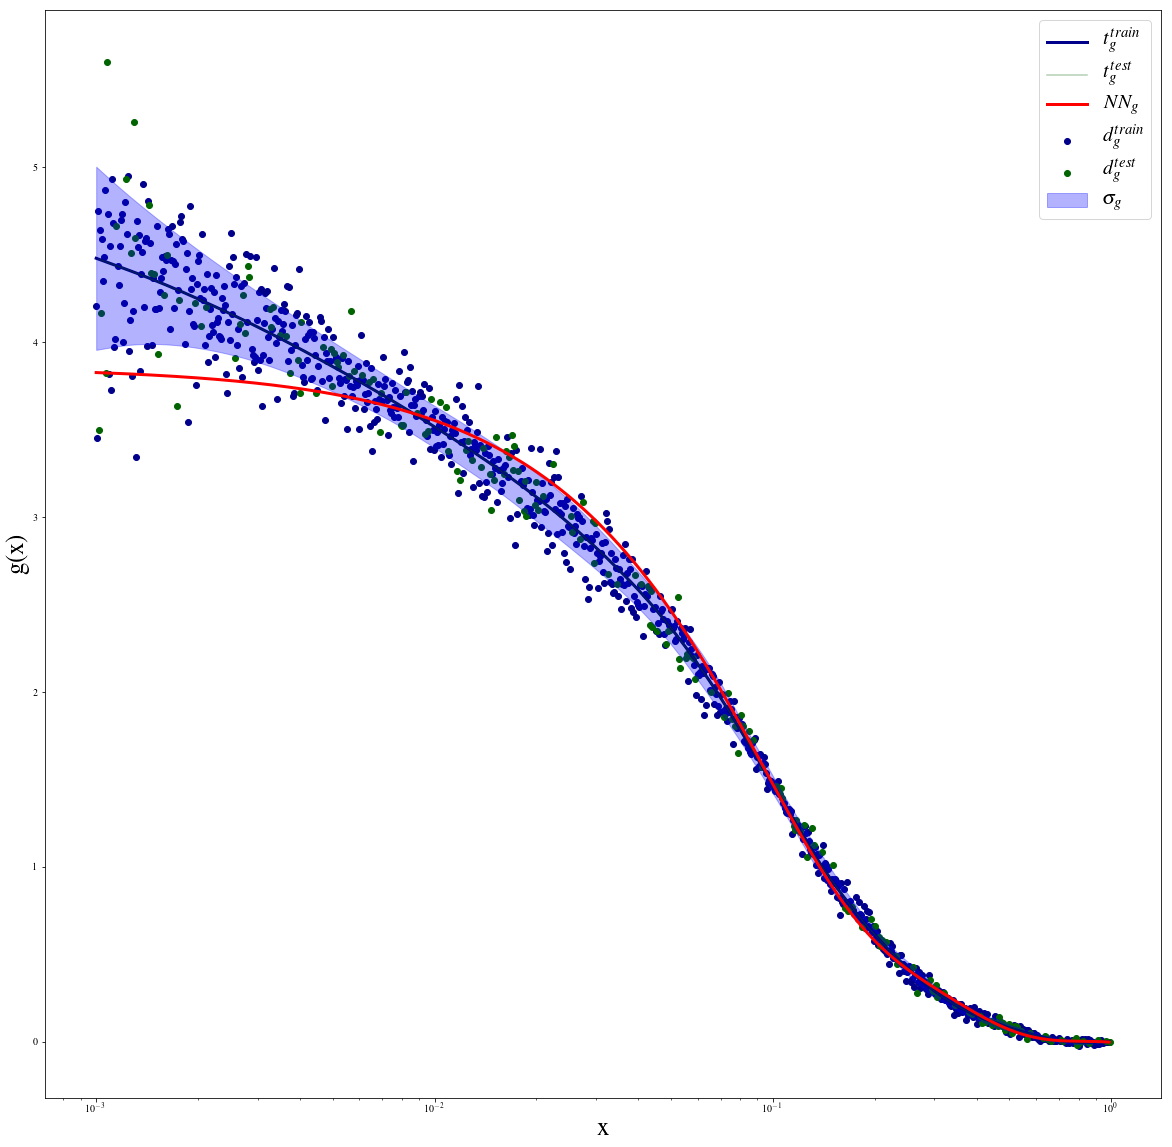

In [24]:
#predictions = np.array(predictions_values.eval(session=tf.Session()))

plt.figure(figsize=(20,20))
ax = plt.subplot(111)
ax.plot(df_train["x"],df_train["gluon_cv"],color='darkblue',label='$t_{g}^{train}$', lw=3)
ax.plot(df_test["x"],df_test["gluon_cv"],color='darkgreen',label='$t_{g}^{test}$',alpha=0.3)

ax.scatter(df_train["x"],train_y, marker="o", color='darkblue',alpha=1.,label='$d_{g}^{train}$')
ax.scatter(df_test["x"],test_y,marker="o",  color = 'darkgreen',alpha=1.,label='$d_{g}^{test}$')

#ax.errorbar(df_train["x"],train_y,yerr=train_sigma,color='darkblue',label='$d_{g}^{train}$',alpha=0.3)
#ax.errorbar(df_test["x"],test_y,yerr=test_sigma,color='darkgreen',label='$d_{g}^{test}$',alpha=0.3)

ax.plot(df_train["x"],predictions_values,color='red',label='$NN_{g}$', lw=3)
ax.fill_between(df_train["x"],df_train["gluon_cv"]+df_train["gluon_sd"],
                df_train["gluon_cv"]-df_train["gluon_sd"] ,color='blue', 
                alpha=0.3, label='$\sigma_{g}$')

#df_train.plot(kind='line',x='x',y=['gluon_cv'], yerr='gluon_sd',color=['red'], ax=ax)
ax.set_xscale('log')
ax.set_ylabel(r'g(x)',fontsize=25)
ax.set_xlabel(r'x',fontsize=25)
ax.legend(loc='best',fontsize=20)
plt.show()